In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from pathlib import Path
from keras.models import load_model

from config import config
from src.trading_evaluation.model_evaluation import evaluate_and_plot
from src.trading_evaluation.granger_causality import granger_causality_tests


df_btc = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "btc.csv",
    parse_dates=["date"],
    index_col="date",
)
df_eth = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "eth.csv",
    parse_dates=["date"],
    index_col="date",
)

# load predictions
y_pred_btc = pd.read_csv(
    config.DATA_DIR
    / "predictions"
    / "hloc_only"
    / "log_price_change_predictions_btc.csv",
    parse_dates=["date"],
    index_col="date",
)
y_pred_eth = pd.read_csv(
    config.DATA_DIR
    / "predictions"
    / "hloc_only"
    / "log_price_change_predictions_eth.csv",
    parse_dates=["date"],
    index_col="date",
)

# slice original df with index of pred
df_btc = df_btc.loc[y_pred_btc.index]
df_eth = df_eth.loc[y_pred_eth.index]

# Model Evaluation


BTC - MSE: 0.0012
BTC - MAE: 0.0238


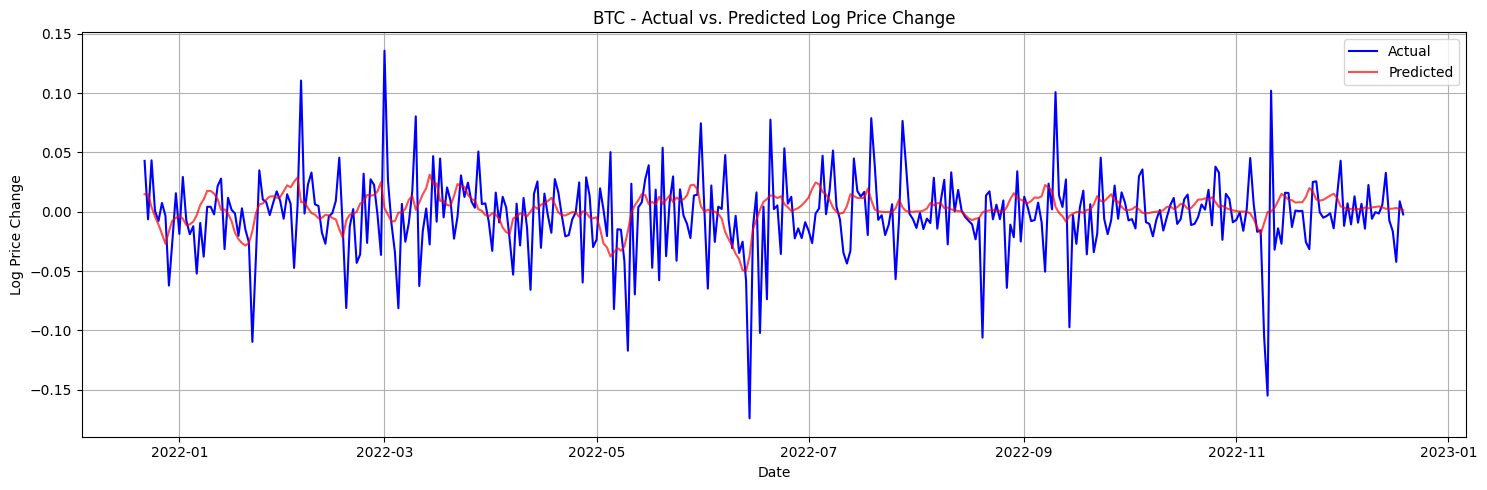

ETH - MSE: 0.0020
ETH - MAE: 0.0323


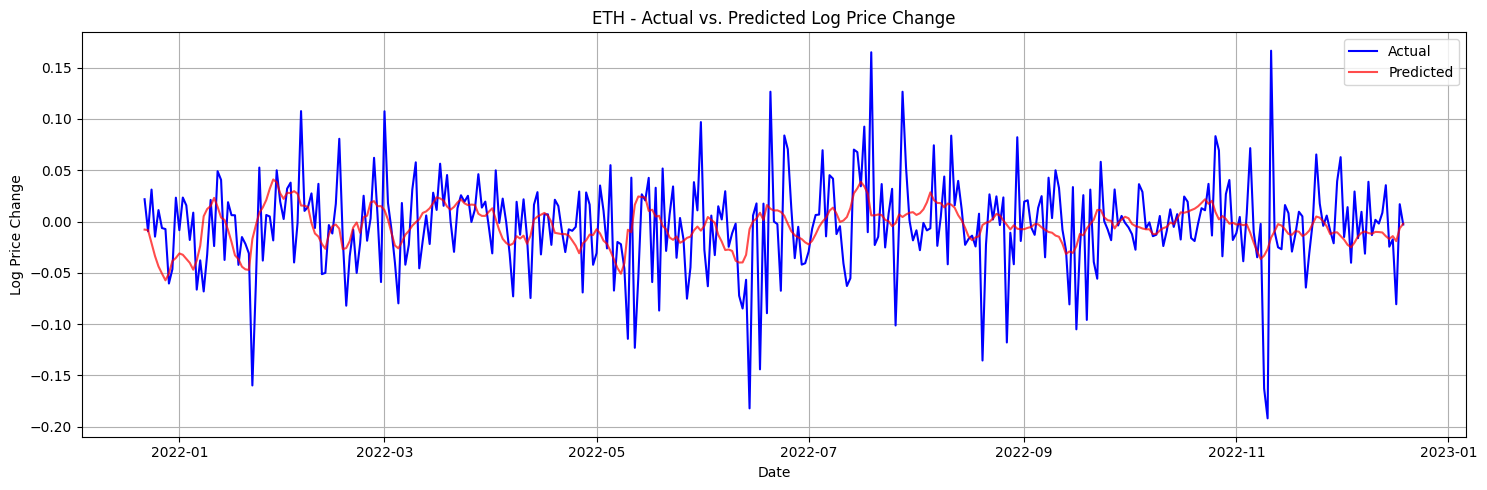

In [5]:


mse_btc, mae_btc = evaluate_and_plot(
    df_btc, y_pred_btc, "logPriceChange", "predictedLogPriceChange", "BTC"
)
mse_eth, mae_eth = evaluate_and_plot(
    df_eth, y_pred_eth, "logPriceChange", "predictedLogPriceChange", "ETH"
)


## Granger Causality

in order to understand which feature was more "influential" to the target, we'll look at how much each feature's history causes changes in the target

In [6]:
granger_results_btc = granger_causality_tests(
    df_btc, "BTC", "logPriceChange", max_lag=30
)
granger_results_eth = granger_causality_tests(
    df_eth, "ETH", "logPriceChange", max_lag=30
)


Granger Causality Test for BTC 'logPriceChange's
--------------------------------------------------
✗ open (best p=2.80e-01)
✗ high (best p=4.20e-01)
✗ low (best p=4.85e-01)
✗ close (best p=4.91e-01)
✗ volume (best p=8.48e-02)
✗ marketCap (best p=4.91e-01)
✗ EMA_12 (best p=4.83e-01)
✗ EMA_26 (best p=4.63e-01)
✓ BB_Middle (lag 5, p=2.27e-02)
✓ BB_Upper (lag 2, p=1.96e-02)
✗ BB_Lower (best p=5.50e-02)
✗ OBV (best p=4.46e-01)
✗ KAMA (best p=2.10e-01)
✗ PPO (best p=1.85e-01)
✗ PPO_Signal (best p=1.73e-01)
✗ PVO (best p=9.65e-02)
✗ PVO_Signal (best p=8.45e-02)
✓ RSI (lag 9, p=5.89e-03)
✓ TSI (lag 4, p=2.41e-02)
✗ Ultimate_Oscillator (best p=3.97e-01)
✗ ADI (best p=6.75e-01)
✗ CMF (best p=5.42e-01)
✗ EMV (best p=1.90e-01)
✗ FI (best p=8.52e-01)
✗ NVI (best p=2.20e-01)
✗ VPT (best p=2.23e-01)
✗ BBM (best p=9.70e-02)
✗ BBW (best p=1.45e-01)
✗ DCM (best p=1.99e-01)
✗ DCW (best p=1.49e-01)
✗ KCM (best p=4.63e-01)
✗ KCW (best p=4.41e-01)
✗ UI (best p=3.97e-01)
✗ Aroon_down (best p=1.98e-01)
✓ Ar